In [3]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fifa_df = pd.read_csv(r'D:\IronHack\Fifa Project\project-fifa-moneyball\fifa21_male2.csv')
fifa_df.sample(10)

C:\Users\aha93\AppData\Local\Temp\ipykernel_13132\28739120.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_df = pd.read_csv(r'D:\IronHack\Fifa Project\project-fifa-moneyball\fifa21_male2.csv')


ID             Name  Age  OVA         Nationality  \
13876  247090     E. Fernández   19   62           Argentina   
16419  257055   J. Breitenbach   22   61             Germany   
847    162369      V. Ibišević   35   75  Bosnia Herzegovina   
5775   212823  Gabriel Barbosa   22   81              Brazil   
12419  242640   T. Christensen   20   65              Norway   
8024   225998       A. McEneff   24   64    Northern Ireland   
13291  245174      B. Anderson   21   61            Scotland   
11756  240654     Carles Pérez   22   73               Spain   
12413  242619      C. Doucouré   20   68                Mali   
11248  238963        C. Greger   23   65             Germany   

                      Club  BOV   BP   Position  \
13876   Defensa y Justicia   65  CAM         CM   
16419    1. FC Saarbrücken   61   RB      RB RM   
847          FC Schalke 04   75   ST         ST   
5775                 Inter   80   CF      ST RW   
12419             Molde FK   67  CAM     CAM RM   
8024       Shamrock Rovers   66   CM     CM CDM   
13291             Aberdeen   63   ST         ST   
11756                 Roma   75  CAM      RM RW   
12413  Racing Club de Lens   69  CDM  CDM CM CB   
11248   SpVgg Unterhaching   67   CB         CB   

                                            Player Photo  ...   CDM   RDM  \
13876  https://cdn.sofifa.com/players/247/090/20_120.png  ...  62+2  62+2   
16419  https://cdn.sofifa.com/players/257/055/20_120.png  ...  54+2  54+2   
847    https://cdn.sofifa.com/players/162/369/20_120.png  ...  55+2  55+2   
5775   https://cdn.sofifa.com/players/212/823/20_120.png  ...  55+2  55+2   
12419  https://cdn.sofifa.com/players/242/640/20_120.png  ...  51+2  51+2   
8024   https://cdn.sofifa.com/players/225/998/20_120.png  ...  62+2  62+2   
13291  https://cdn.sofifa.com/players/245/174/20_120.png  ...  34+2  34+2   
11756  https://cdn.sofifa.com/players/240/654/20_120.png  ...  54+2  54+2   
12413  https://cdn.sofifa.com/players/242/619/20_120.png  ...  67+2  67+2   
11248  https://cdn.sofifa.com/players/238/963/20_120.png  ...  56+2  56+2   

        RWB    LB   LCB    CB   RCB    RB    GK Gender  
13876  61+2  61+2  59+2  59+2  59+2  61+2  14+2   Male  
16419  59+2  59+2  55+2  55+2  55+2  59+2  15+2   Male  
847    53+2  51+2  55+2  55+2  55+2  51+2  22+2   Male  
5775   59+2  55+2  47+2  47+2  47+2  55+2  17+2   Male  
12419  54+2  51+2  44+2  44+2  44+2  51+2  16+2   Male  
8024   62+2  61+2  58+2  58+2  58+2  61+2  15+2   Male  
13291  39+2  37+2  31+2  31+2  31+2  37+2  15+2   Male  
11756  57+2  53+2  47+2  47+2  47+2  53+2  15+2   Male  
12413  66+2  65+2  65+2  65+2  65+2  65+2  18+2   Male  
11248  54+2  57+2  65+2  65+2  65+2  57+2  15+2   Male  

[10 rows x 107 columns]

In [5]:
fifa_df.shape

(17125, 107)

In [6]:
fifa_df['ID'].nunique()

17125

In [7]:
np.array(fifa_df.columns).reshape(-1)

array(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT',
       'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract',
       'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve',
       'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'P

In [8]:
fifa_df[fifa_df.columns[fifa_df.isnull().any()]].isnull().sum()

Club                 23
Position            413
Club Logo            23
Joined               58
Loan Date End     16215
Volleys              58
Curve                58
Agility              58
Balance              58
Jumping              58
Interceptions         7
Positioning           7
Vision               58
Composure           423
Sliding Tackle       58
A/W                  89
D/W                  89
dtype: int64

In [9]:
fifa_ST = fifa_df.query('BP == "ST"')


In [10]:
fifa_ST_filtered = fifa_ST[['ID', 'Name', 'Age', 'Height', 'Weight', 'Shot Power', 'Skill', 'Mentality', 'Dribbling', 'Sprint Speed', 'Acceleration', 'Agility', 'ST', 'Stamina', 'Balance']]
fifa_ST_filtered

ID             Name  Age Height  Weight  Shot Power  Skill  \
3          36         D. Yorke   36  5'11"  165lbs          63    255   
17        670             Zulu   26   6'4"  198lbs          56    269   
29       1198       F. Inzaghi   37  5'11"  163lbs          55    237   
39       1845      O. Solskjær   34   5'9"  163lbs          72    264   
44       2231        E. Heskey   37   6'1"  205lbs          77    265   
...       ...              ...  ...    ...     ...         ...    ...   
17095  259031         L. Delap   17   6'1"  159lbs          64    254   
17104  259054     Tiago Morais   16   5'9"  132lbs          65    269   
17111  259071     Adrián Turmo   19   5'9"  154lbs          66    236   
17118  259084       R. Shanley   19   6'1"  161lbs          53    199   
17124  259105  Pablo Rodríguez   18  5'10"  154lbs          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility    ST  \
3            271         68            62            59      NaN  67+0   
17           261         61            76            72   68.000  66+0   
29           288         50            39            67   53.000  72+1   
39           287         74            64            65      NaN  75+0   
44           329         63            45            42   50.000  66+0   
...          ...        ...           ...           ...      ...   ...   
17095        217         59            79            77   74.000  61+2   
17104        224         62            78            75   77.000  61+2   
17111        254         58            75            78   72.000  62+2   
17118        221         50            67            66   62.000  54+2   
17124        224         57            72            68   59.000  59+2   

       Stamina  Balance  
3           51      NaN  
17          71   78.000  
29          31   65.000  
39          58      NaN  
44          33   46.000  
...        ...      ...  
17095       57   62.000  
17104       56   72.000  
17111       58   77.000  
17118       57   58.000  
17124       55   65.000  

[2660 rows x 15 columns]

In [11]:
fifa_ST_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 3 to 17124
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2660 non-null   int64  
 1   Name          2660 non-null   object 
 2   Age           2660 non-null   int64  
 3   Height        2660 non-null   object 
 4   Weight        2660 non-null   object 
 5   Shot Power    2660 non-null   int64  
 6   Skill         2660 non-null   int64  
 7   Mentality     2660 non-null   int64  
 8   Dribbling     2660 non-null   int64  
 9   Sprint Speed  2660 non-null   int64  
 10  Acceleration  2660 non-null   int64  
 11  Agility       2644 non-null   float64
 12  ST            2660 non-null   object 
 13  Stamina       2660 non-null   int64  
 14  Balance       2644 non-null   float64
dtypes: float64(2), int64(9), object(4)
memory usage: 332.5+ KB


In [12]:
fifa_ST_filtered.isnull().sum()

ID               0
Name             0
Age              0
Height           0
Weight           0
Shot Power       0
Skill            0
Mentality        0
Dribbling        0
Sprint Speed     0
Acceleration     0
Agility         16
ST               0
Stamina          0
Balance         16
dtype: int64

In [13]:
fifa_ST_filtered.shape

(2660, 15)

In [14]:
fifa_ST_filtered.dropna(inplace=True)

C:\Users\aha93\AppData\Local\Temp\ipykernel_13132\3005986459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered.dropna(inplace=True)


In [15]:
fifa_ST_filtered

ID             Name  Age Height  Weight  Shot Power  Skill  \
17        670             Zulu   26   6'4"  198lbs          56    269   
29       1198       F. Inzaghi   37  5'11"  163lbs          55    237   
44       2231        E. Heskey   37   6'1"  205lbs          77    265   
47       2702       K. Ellison   41  5'11"  168lbs          69    296   
52       3467             Yuri   37   6'1"  172lbs          69    318   
...       ...              ...  ...    ...     ...         ...    ...   
17095  259031         L. Delap   17   6'1"  159lbs          64    254   
17104  259054     Tiago Morais   16   5'9"  132lbs          65    269   
17111  259071     Adrián Turmo   19   5'9"  154lbs          66    236   
17118  259084       R. Shanley   19   6'1"  161lbs          53    199   
17124  259105  Pablo Rodríguez   18  5'10"  154lbs          58    235   

       Mentality  Dribbling  Sprint Speed  Acceleration  Agility     ST  \
17           261         61            76            72   68.000   66+0   
29           288         50            39            67   53.000   72+1   
44           329         63            45            42   50.000   66+0   
47           311         64            42            45   60.000  61+-3   
52           296         70            67            64   68.000   71+0   
...          ...        ...           ...           ...      ...    ...   
17095        217         59            79            77   74.000   61+2   
17104        224         62            78            75   77.000   61+2   
17111        254         58            75            78   72.000   62+2   
17118        221         50            67            66   62.000   54+2   
17124        224         57            72            68   59.000   59+2   

       Stamina  Balance  
17          71   78.000  
29          31   65.000  
44          33   46.000  
47          49   67.000  
52          65   56.000  
...        ...      ...  
17095       57   62.000  
17104       56   72.000  
17111       58   77.000  
17118       57   58.000  
17124       55   65.000  

[2644 rows x 15 columns]

In [16]:
foots = (fifa_ST_filtered['Height'].str.split("'")).str[0]
inches = (fifa_ST_filtered['Height'].str.split("'")).str[1].str.rstrip('"')

In [17]:
foots = [float(i) for i in foots]
inches = [float(i) for i in inches]

In [18]:
type(inches[0])

float

In [19]:
hight_cm = list(map(lambda x, y: round(((x*12)+y) * 2.54,2) , foots, inches))

In [20]:
weights = (fifa_ST_filtered['Weight'].str.split("lbs")).str[0]
weights = [round(float(i)*0.4535,2) for i in weights]


In [21]:
fifa_ST_filtered.drop(['Height','Weight'],axis=1)


ID             Name  Age  Shot Power  Skill  Mentality  Dribbling  \
17        670             Zulu   26          56    269        261         61   
29       1198       F. Inzaghi   37          55    237        288         50   
44       2231        E. Heskey   37          77    265        329         63   
47       2702       K. Ellison   41          69    296        311         64   
52       3467             Yuri   37          69    318        296         70   
...       ...              ...  ...         ...    ...        ...        ...   
17095  259031         L. Delap   17          64    254        217         59   
17104  259054     Tiago Morais   16          65    269        224         62   
17111  259071     Adrián Turmo   19          66    236        254         58   
17118  259084       R. Shanley   19          53    199        221         50   
17124  259105  Pablo Rodríguez   18          58    235        224         57   

       Sprint Speed  Acceleration  Agility     ST  Stamina  Balance  
17               76            72   68.000   66+0       71   78.000  
29               39            67   53.000   72+1       31   65.000  
44               45            42   50.000   66+0       33   46.000  
47               42            45   60.000  61+-3       49   67.000  
52               67            64   68.000   71+0       65   56.000  
...             ...           ...      ...    ...      ...      ...  
17095            79            77   74.000   61+2       57   62.000  
17104            78            75   77.000   61+2       56   72.000  
17111            75            78   72.000   62+2       58   77.000  
17118            67            66   62.000   54+2       57   58.000  
17124            72            68   59.000   59+2       55   65.000  

[2644 rows x 13 columns]

In [22]:
fifa_ST_filtered['Height'] = hight_cm


C:\Users\aha93\AppData\Local\Temp\ipykernel_13132\2366279236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['Height'] = hight_cm


In [23]:
fifa_ST_filtered['Weight'] = weights

C:\Users\aha93\AppData\Local\Temp\ipykernel_13132\3620838423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['Weight'] = weights


In [24]:
fifa_ST_filtered.reset_index(drop=True,inplace=True)

In [25]:
fifa_ST_filtered['ST'] = fifa_ST_filtered['ST'].apply(eval)

C:\Users\aha93\AppData\Local\Temp\ipykernel_13132\2403058911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_ST_filtered['ST'] = fifa_ST_filtered['ST'].apply(eval)


In [26]:
fifa_ST_filtered

ID             Name  Age  Height  Weight  Shot Power  Skill  \
0        670             Zulu   26 193.040  89.790          56    269   
1       1198       F. Inzaghi   37 180.340  73.920          55    237   
2       2231        E. Heskey   37 185.420  92.970          77    265   
3       2702       K. Ellison   41 180.340  76.190          69    296   
4       3467             Yuri   37 185.420  78.000          69    318   
...      ...              ...  ...     ...     ...         ...    ...   
2639  259031         L. Delap   17 185.420  72.110          64    254   
2640  259054     Tiago Morais   16 175.260  59.860          65    269   
2641  259071     Adrián Turmo   19 175.260  69.840          66    236   
2642  259084       R. Shanley   19 185.420  73.010          53    199   
2643  259105  Pablo Rodríguez   18 177.800  69.840          58    235   

      Mentality  Dribbling  Sprint Speed  Acceleration  Agility  ST  Stamina  \
0           261         61            76            72   68.000  66       71   
1           288         50            39            67   53.000  73       31   
2           329         63            45            42   50.000  66       33   
3           311         64            42            45   60.000  58       49   
4           296         70            67            64   68.000  71       65   
...         ...        ...           ...           ...      ...  ..      ...   
2639        217         59            79            77   74.000  63       57   
2640        224         62            78            75   77.000  63       56   
2641        254         58            75            78   72.000  64       58   
2642        221         50            67            66   62.000  56       57   
2643        224         57            72            68   59.000  61       55   

      Balance  
0      78.000  
1      65.000  
2      46.000  
3      67.000  
4      56.000  
...       ...  
2639   62.000  
2640   72.000  
2641   77.000  
2642   58.000  
2643   65.000  

[2644 rows x 15 columns]

In [27]:
fifa_ST_filtered.isnull().sum()

ID              0
Name            0
Age             0
Height          0
Weight          0
Shot Power      0
Skill           0
Mentality       0
Dribbling       0
Sprint Speed    0
Acceleration    0
Agility         0
ST              0
Stamina         0
Balance         0
dtype: int64

In [28]:
fifa_ST_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2644 non-null   int64  
 1   Name          2644 non-null   object 
 2   Age           2644 non-null   int64  
 3   Height        2644 non-null   float64
 4   Weight        2644 non-null   float64
 5   Shot Power    2644 non-null   int64  
 6   Skill         2644 non-null   int64  
 7   Mentality     2644 non-null   int64  
 8   Dribbling     2644 non-null   int64  
 9   Sprint Speed  2644 non-null   int64  
 10  Acceleration  2644 non-null   int64  
 11  Agility       2644 non-null   float64
 12  ST            2644 non-null   int64  
 13  Stamina       2644 non-null   int64  
 14  Balance       2644 non-null   float64
dtypes: float64(4), int64(10), object(1)
memory usage: 310.0+ KB


In [29]:
fifa_ST_filtered.duplicated().sum()

0

<Axes: >

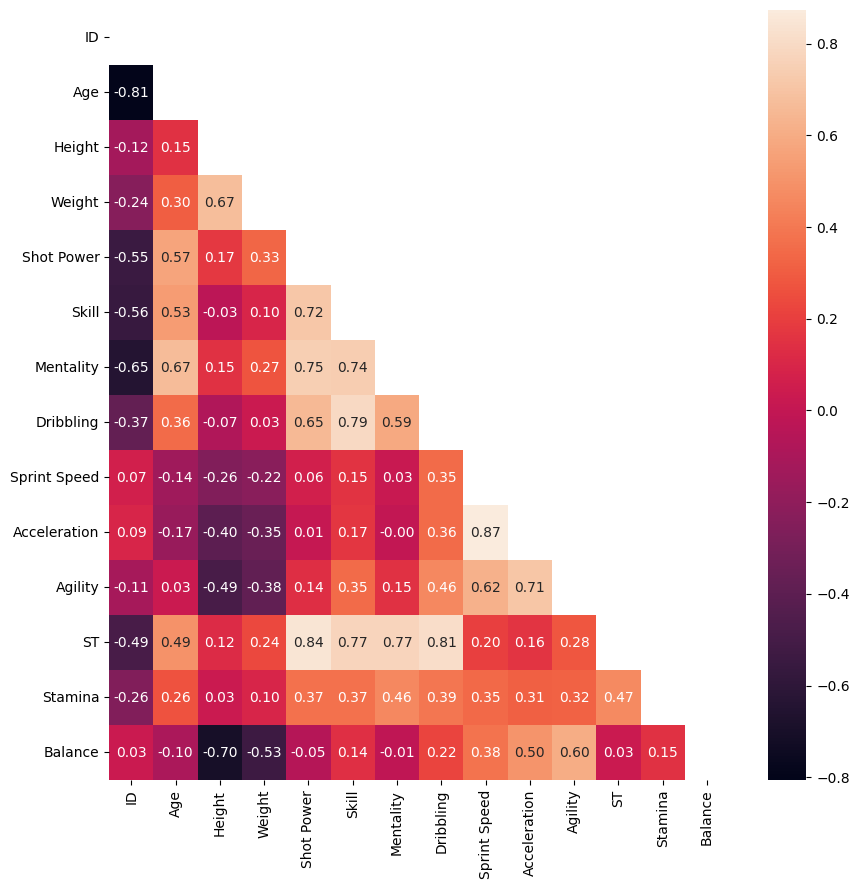

In [30]:
# After preparinf data set, now it's the time to see how features are corelated. the Heat map is a proper choice.
# The method is set to Spearman, since the size of data set is relatively large.

fifa_ST_filtered_corr = fifa_ST_filtered.corr(method='spearman', numeric_only=True)
mask = np.zeros_like(fifa_ST_filtered_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (10,10))
sns.heatmap(fifa_ST_filtered_corr, mask=mask, annot=True,annot_kws={'size': 10},fmt=".2f")


C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aha93\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

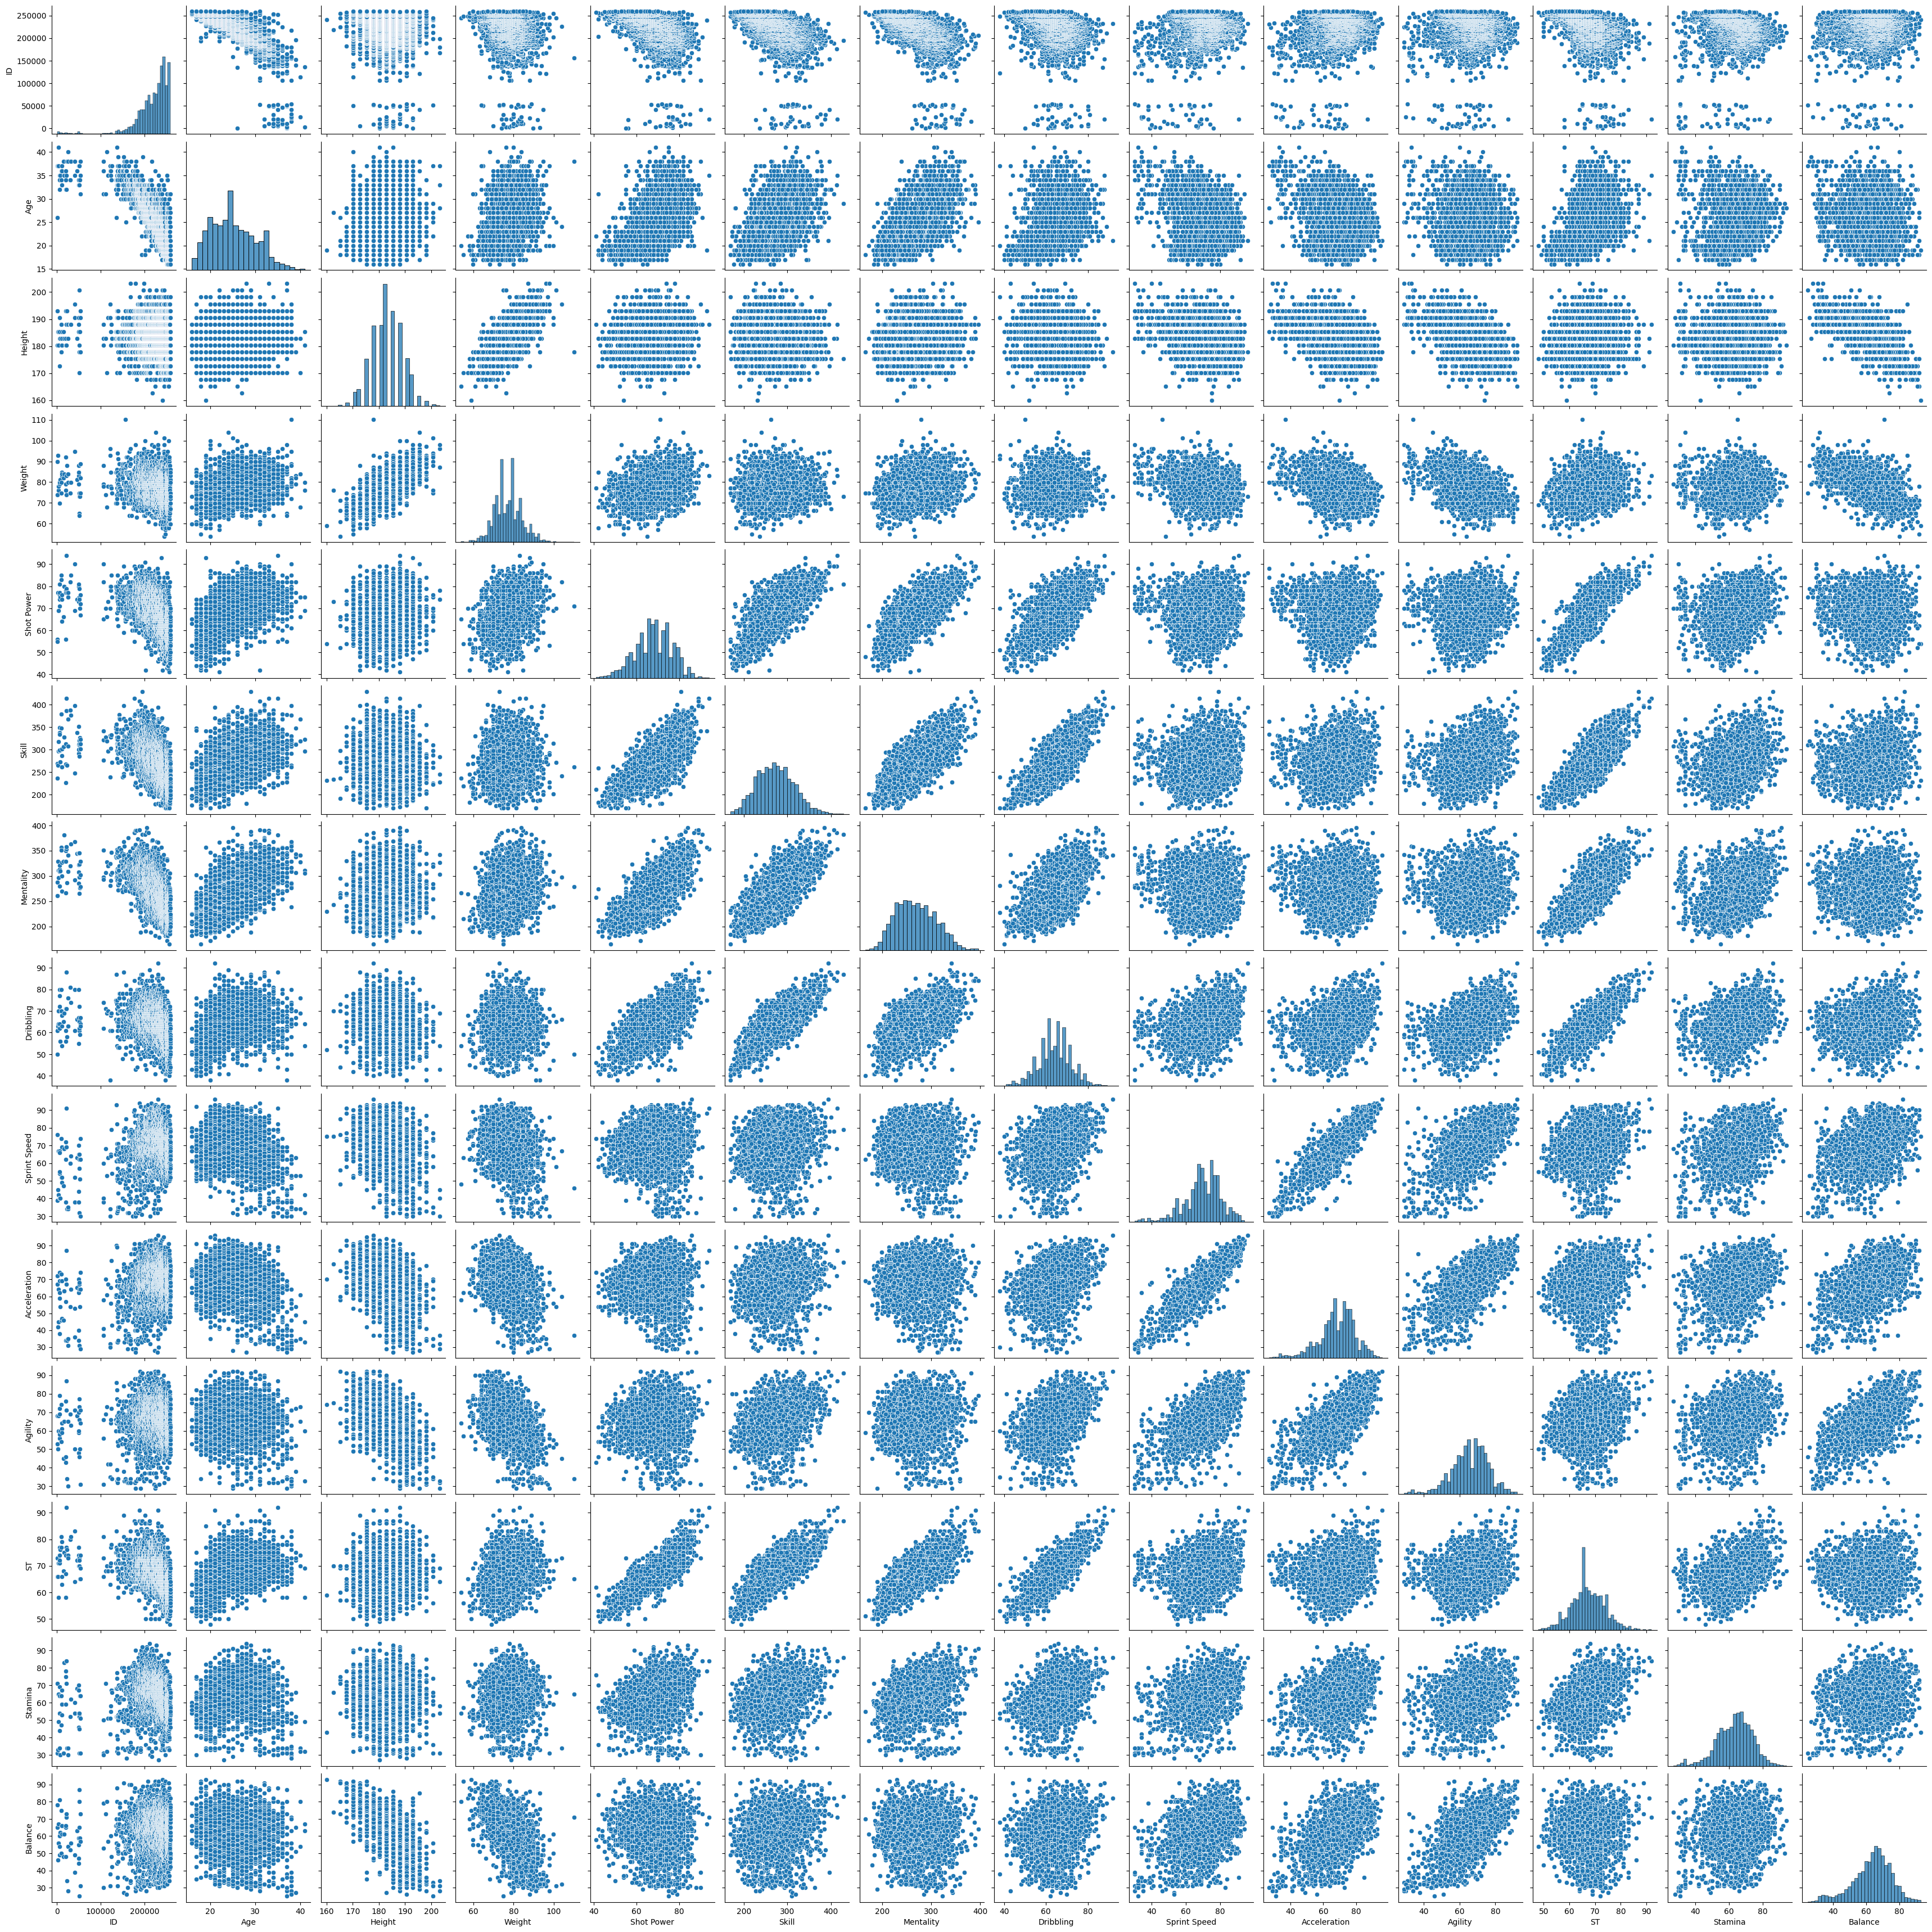

In [31]:
# For better understanding of how variables are corelated, a pair plot is generated.
sns.pairplot(fifa_ST_filtered)
plt.show()

Based on the heatmap and pairplot result, the 'Shoot power','Skill','Mentality','Dribbling'and 'stamina' are the most correlated variables to our dependent variable, ST. We are gonna train our Multi variable linear regression(MVLRG) model with these features.

In [52]:
#The first step is to split the data set into to subsets. Trainning set which contains 80 percent of the whole data and 
# Test set with the reamaining 20 percent. Random_state argument works somehow like random.seed() in our case and prevents 
# two sub sets of changing each time the cell is executed.

#X = fifa_ST_filtered[['Shot Power','Mentality','Skill','Dribbling','Stamina']]
#X = fifa_ST_filtered[['Shot Power','Dribbling']]
X = fifa_ST_filtered[['Mentality','Skill','Shot Power']]
Y = fifa_ST_filtered['ST']
X_train, X_test, y_train, y_test = train_test_split(
  X,Y ,random_state=100,test_size=0.2, shuffle=True)
print('X_train : ')
print(X_train.head())
print(X_train.shape)
print(type(X_train))
 
print('')
print('X_test : ')
print(X_test.head())
print(X_test.shape)
print(type(X_test))
 
print('')
print('y_train : ')
print(y_train.head())
print(y_train.shape)
print(type(y_train))
 
print('')
print('y_test : ')
print(y_test.head())
print(y_test.shape)
print(type(y_test))

X_train : 
      Mentality  Skill  Shot Power
232         286    292          75
2552        213    270          68
272         306    253          76
1280        238    290          64
2299        217    226          55
(2115, 3)
<class 'pandas.core.frame.DataFrame'>

X_test : 
      Mentality  Skill  Shot Power
1674        229    227          63
463         321    296          80
945         228    238          59
696         259    289          67
1770        221    245          59
(529, 3)
<class 'pandas.core.frame.DataFrame'>

y_train : 
232     72
2552    64
272     66
1280    65
2299    58
Name: ST, dtype: int64
(2115,)
<class 'pandas.core.series.Series'>

y_test : 
1674    66
463     74
945     63
696     66
1770    64
Name: ST, dtype: int64
(529,)
<class 'pandas.core.series.Series'>


In [53]:
# The next step is to train the model.
model = linear_model.LinearRegression()
result = model.fit(X_train,y_train)

In [54]:
#pd.DataFrame(data=[result.coef_],index=['Coef'], columns=[['Shot Power','Mentality','Skill','Dribbling','Stamina']])
#pd.DataFrame(data=[result.coef_],index=['Coef'], columns=[['Shot Power','Dribbling']])
pd.DataFrame(data=[result.coef_],index=['Coef'], columns=[['Mentality','Skill','Shot Power']])


Mentality Skill Shot Power
Coef     0.033 0.042      0.363

The MVLRG result shows that skill, Stamina and Mentality have not much of say in the prediction of the result. It may cuased becuase of collinearity of these variables which will be tested.

In [55]:
f"Intercept equals to {round(result.intercept_,3)}."

'Intercept equals to 22.204.'

In [56]:
R2_train = model.score(X_train,y_train)
R2_train

0.8050819672811339

In [57]:
R2_test = model.score(X_test,y_test)
R2_test

0.7773641064027941

In [58]:
R2_score = pd.DataFrame([[R2_train,R2_test]],columns=['Train','Test'])
cols = [('R2 Score','Train'),('R2 Score','Test')]
R2_score.columns = pd.MultiIndex.from_tuples(cols)
R2_score


R2 Score      
     Train  Test
0    0.805 0.777

The R2 score for trian and test sets are quite promising.

In [39]:
# To test the existence of the multicollinearity, we used variance_inflation_factor(VIF) method from statsmodels library.
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif_data


feature     VIF
0  Shot Power 160.643
1   Mentality 136.141
2       Skill 176.453
3   Dribbling 181.729
4     Stamina  42.502

Reslut of VIF method is not as we predicted. We gussed that there is a collinearity among skills and other variables, however the result suggests that there are  collinearity among all the variables! If it was true the R2 score shoul've be terrible, but we saw that it's not. We tried to test the model with other set of independent variables, but the current set generates the best result.
